In [49]:
"1 QBM Agent - 3x3 Grid - 1 Goal - Random Starting Point"
"0.005 LR - 8 Mini Batch - 250 Warm Up"
"5 Runs - 300 Max Steps - 500 Episodes - 190-220 Reward Optimal"
"Tests how ERB influences learning"


from neptune import Session
import pandas as pd

session = Session()
project = session.get_project('tobiasmueller/qmarl')

exps_erb_1 = project.get_experiments(['QMAR-2', 'QMAR-3', 'QMAR-4', 'QMAR-5', 'QMAR-6'])

In [50]:
import numpy as np

values_erb_1 = [exp.get_numeric_channels_values("episode_rewards")['episode_rewards']
              for exp in exps_erb_1]

In [51]:
steps_erb_1 = [exp.get_numeric_channels_values("episode_steps")['episode_steps']
              for exp in exps_erb_1]

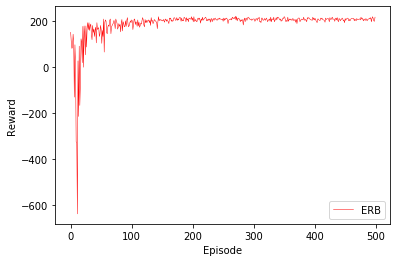

In [52]:
import matplotlib.pyplot as plt

plt.plot(np.average(values_erb_1, axis=0), color='red', label="ERB", linewidth=0.5)

plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.show()

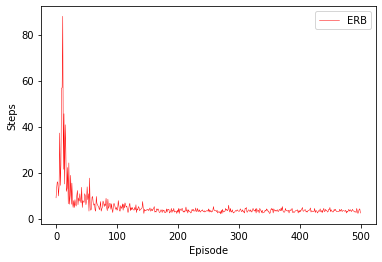

In [53]:
plt.plot(np.average(steps_erb_1, axis=0), color='red', label="ERB", linewidth=0.5)
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.legend()
plt.show()